(3648, 2736)

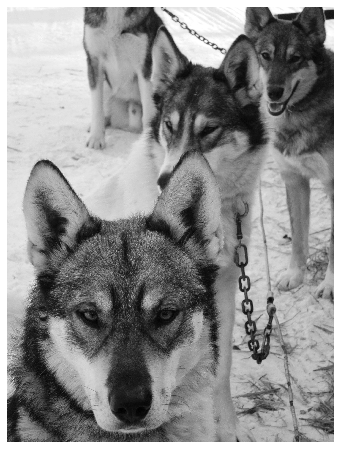

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','sled_dogs.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

display(np.shape(X))
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.animation as animation
from IPython.core.display import display, HTML
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots()

j = 0
ims=[]
for r in range(100):
    # Construct approximate image
#     Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
#     Xapprox = np.dot(np.array([U[:,r]]).T, [S[r,r]*VT[r,:]])
    Xapprox = U[:,r:] @ S[r:,r:] @ VT[r:,:]
#     display(np.shape(VT[r,:]))
    img = ax.imshow(Xapprox, animated=True)
    img.set_cmap('gray')
    ims.append([img])
ani = animation.ArtistAnimation(fig, ims, interval=333, blit=True,
                                repeat_delay=1000)
myvid = ani.to_html5_video()
display(HTML(myvid))
#     plt.axis('off')
#     plt.title('r = ' + str(r))
#     plt.show()

In [ ]:
# display(np.shape([S[r,r]*VT[r,:]]))
# display(np.shape((np.array([U[r,:]]).T)))
display(np.shape(U[:,r]))

In [ ]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()